# Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Importing the dataset

In [3]:
df=pd.read_csv("Social_Network_Adss.csv")

In [4]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# Preprocessing the dataset 

In [6]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [8]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [9]:
x=df[["Age","EstimatedSalary"]]
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [10]:
y=df["Purchased"]

In [11]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

# Splitting the dataset into training and testing

In [12]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3)

In [13]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

In [14]:
def Elbow(k):
    test_error=[]
    for i in k:
        clf=KNN(n_neighbors=i)
        clf.fit(train_x,train_y)
        tmp=clf.predict(test_x)
        tmp=f1_score(test_y,tmp)
        error=1-tmp
        test_error.append(error)
    return test_error

In [15]:
k=range(6,20,2)

In [16]:
test=Elbow(k)

# Data Visualisation

Text(0, 0.5, 'test_error')

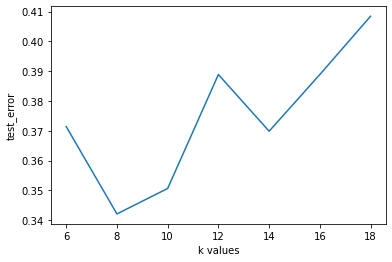

In [77]:
plt.plot(k,test)
plt.xlabel("k values")
plt.ylabel("test_error")

In [17]:
clf=KNN(n_neighbors=8)
clf.fit(train_x,train_y)
y_predicted=clf.predict(test_x)
k=f1_score(test_y,y_predicted)
error=1-k
print("error=",error)
print("accuracy=",k) 

error= 0.2857142857142857
accuracy= 0.7142857142857143


In [42]:
x_new=[32,150000]
if(x_new[0]<=19 or x_new[1]<19000):
    print("Inputs are invalid")
else:
    y_pred=clf.predict([x_new])
    print(y_pred)
    

[1]


In [33]:
x_new=[47,25000]
if(x_new[0]<=19 or x_new[1]<19000):
    print("Inputs are invalid")
else:
    y_pred=clf.predict([x_new])
    print(y_pred)
    

[1]


In [35]:
df1=df[df['Purchased']==1]
df1

,User ID,Gender,Age,EstimatedSalary,Purchased
7,15694829,Female,32,150000,1
16,15733883,Male,47,25000,1
17,15617482,Male,45,26000,1
18,15704583,Male,46,28000,1
19,15621083,Female,48,29000,1
...,...,...,...,...,...
393,15635893,Male,60,42000,1
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1


In [36]:
df2=df1[df1['Gender']=='Female']
df2['Age'].min()

27

In [37]:
df3=df1[df1['Gender']=='Male']
df3['Age'].min()

28

In [40]:
df4=df1[df1['Gender']=='Female']
df4['EstimatedSalary'].min()

20000

In [41]:
df5=df1[df1['Gender']=='Male']
df5['EstimatedSalary'].min()

20000